In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
cd "C:\Users\saads\Downloads\pyt\ANN-durge-dataset-classification-main"

C:\Users\saads\Downloads\pyt\ANN-durge-dataset-classification-main


In [3]:
df=pd.read_csv("drug200.csv")

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### Separate numerical & categorical columns

In [8]:
cat=['Sex', 'BP', 'Cholesterol', 'Drug']
con=['Age',  'Na_to_K']

### Visualization

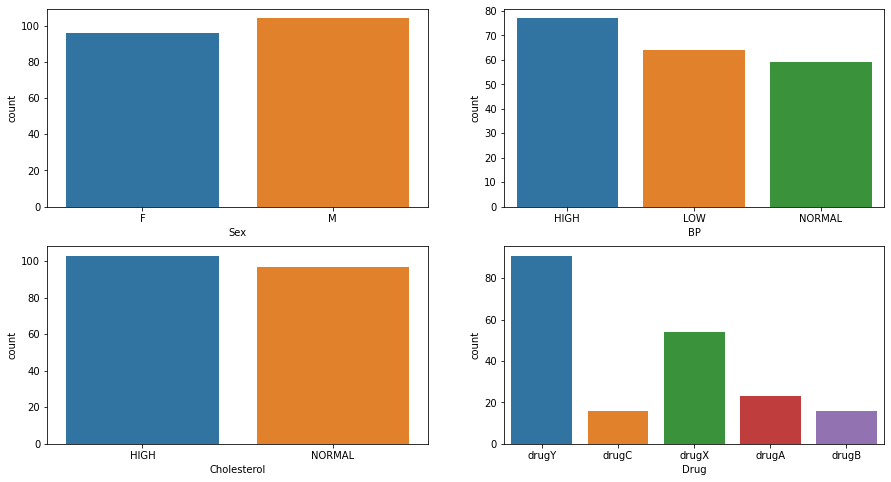

In [9]:
count=1
plt.figure(figsize = (15,8))
for i in cat:
    plt.subplot(2,2,count)
    sns.countplot(x=i,data=df)
    count=count+1
plt.show()

C:\Users\saads\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saads\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


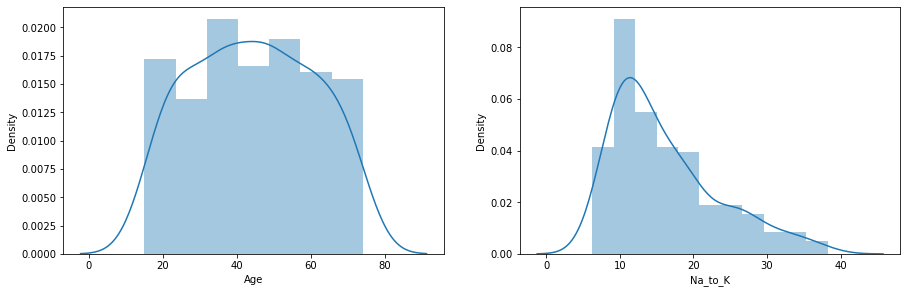

In [10]:
count=1
plt.figure(figsize = (15,10))
for i in con:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count+=1
plt.show()

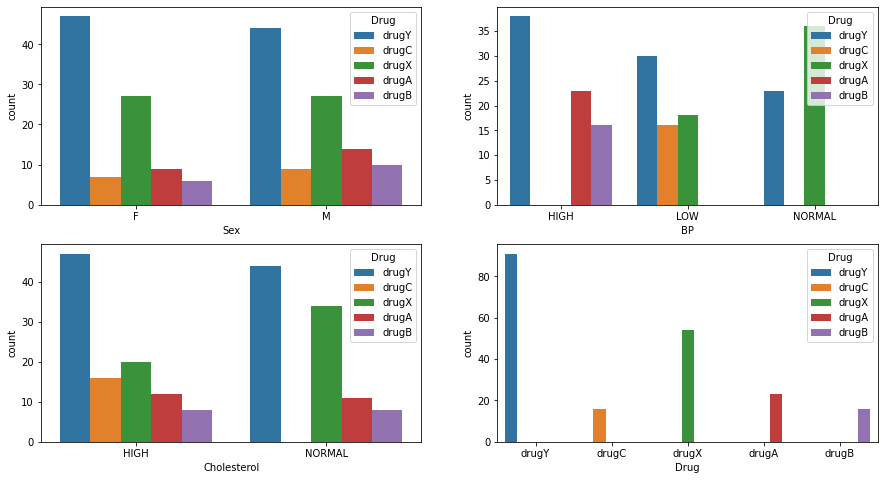

In [11]:
count=1
plt.figure(figsize = (15,8))
for i in cat:
    plt.subplot(2,2,count)
    sns.countplot(x=i,hue="Drug",data=df)
    count+=1
plt.show()

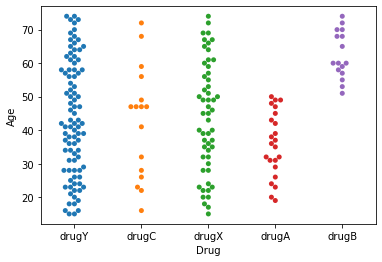

In [12]:
sns.swarmplot(x="Drug",y='Age',data=df)
plt.show()

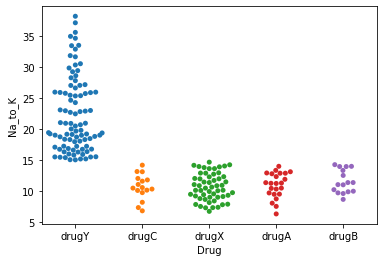

In [13]:
sns.swarmplot(x="Drug",y='Na_to_K',data=df)
plt.show()

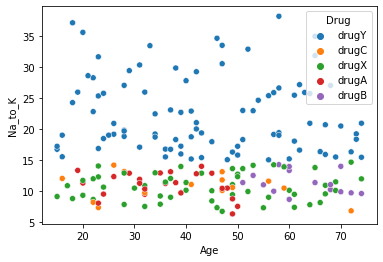

In [14]:
sns.scatterplot(x="Age",y="Na_to_K",hue="Drug",data=df)
plt.show()

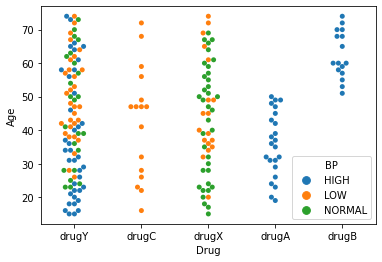

In [15]:
sns.swarmplot(x="Drug",y="Age",hue='BP',data=df)
plt.show()

### Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
encoder=ColumnTransformer([('one',OneHotEncoder(),[1,2,3])],remainder='passthrough')

In [18]:
x1=encoder.fit_transform(df)
x1=pd.DataFrame(x1)
x1.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,1,0,23,25.355,drugY
1,0,1,0,1,0,1,0,47,13.093,drugC
2,0,1,0,1,0,1,0,47,10.114,drugC
3,1,0,0,0,1,1,0,28,7.798,drugX
4,1,0,0,1,0,1,0,61,18.043,drugY


In [19]:
l1=LabelEncoder()


In [20]:
y=l1.fit_transform(df["Drug"])
y=pd.DataFrame(y)
y.head()

,0
0,4
1,2
2,2
3,3
4,4


In [21]:
print(x1.shape)
print(y.shape)

(200, 10)
(200, 1)


In [22]:
x1.drop(9, axis=1, inplace=True)

In [23]:
x1.head()

,0,1,2,3,4,5,6,7,8
0,1,0,1,0,0,1,0,23,25.355
1,0,1,0,1,0,1,0,47,13.093
2,0,1,0,1,0,1,0,47,10.114
3,1,0,0,0,1,1,0,28,7.798
4,1,0,0,1,0,1,0,61,18.043


### Splitting data into train & test

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.3, random_state=100)

In [25]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(140, 9)
(60, 9)
(140, 1)
(60, 1)


### Model Building

In [26]:
from sklearn.neural_network import MLPClassifier
algo=MLPClassifier(hidden_layer_sizes=(60,60),activation='relu',
                  max_iter=2000, random_state=100)

In [27]:
algo.fit(xtrain,ytrain)

C:\Users\saads\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(hidden_layer_sizes=(60, 60), max_iter=2000, random_state=100)

In [28]:
from sklearn.metrics import accuracy_score
ypred=algo.predict(xtest)

### Evaluation

In [29]:
accuracy_score(ytest,ypred)

0.9666666666666667

In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred))

[[ 3  0  0  0  0]
 [ 1  6  0  0  1]
 [ 0  0  5  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 31]]


In [31]:
from sklearn.metrics import f1_score
print(f1_score(ytest,ypred, average="macro"))

0.9396825396825397
